In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import htwt
import nb
import mcc
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [39]:
X, y = htwt.get()

In [36]:
reload(nb)
cl = BernoulliNB()
clf = nb.bernoulli()
clf.fit(1 * (X > 0), y)
y_hat = clf.predict(1 * (X > 0))
print '%0.3f' % np.mean(np.mean(y_hat != y))

0.348


In [37]:
import generative
reload(generative)
reload(nb)
clf = nb.gaussian()
clf.fit(X, y)
y_hat = clf.predict(X)
print '%0.3f' % np.mean(np.mean(y_hat != y))

0.124


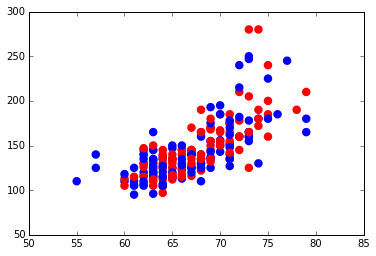

In [82]:
#plt.plot(X[:, 0], X[:, 1], 'ro', markeredgecolor = y.astype(int), markeredgewidth = 1.5, markerfacecolor = 'none')
plt.scatter(X[:, 0], X[:, 1], edgecolor = ['red', 'blue'], linewidth = 4, facecolors='none')
plt.show()